In [1]:
#!pip install learntools 

In [2]:
#!pip install geopy

In [3]:
#!pip install folium

In [4]:
import math
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim

import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [5]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [6]:
starbucks = pd.read_csv("directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [7]:
# How many rows in each column have missing values?
print(starbucks.isnull().sum())

# View rows with missing locations
rows_with_missing = starbucks[starbucks["City"]=="Berkeley"]
rows_with_missing

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
12794,Starbucks,5406-945,2224 Shattuck - Berkeley,Company Owned,2224 Shattuck Avenue,Berkeley,CA,US,947041416,(510) 843-6806,GMT-08:00 America/Los_Angeles,-122.27,37.87
12795,Starbucks,570-512,Solano Ave,Company Owned,1799 Solano Avenue,Berkeley,CA,US,947072209,(510) 525-5885,GMT-08:00 America/Los_Angeles,-122.28,37.89
12796,Starbucks,17877-164526,Safeway - Berkeley #691,Licensed,1444 Shattuck Place,Berkeley,CA,US,947091411,510-526-3086,GMT-08:00 America/Los_Angeles,-122.27,37.88
12797,Starbucks,19864-202264,Telegraph & Ashby,Company Owned,3001 Telegraph Avenue,Berkeley,CA,US,94705,510 8839070,GMT-08:00 America/Los_Angeles,-122.26,37.86
12798,Starbucks,9217-9253,2128 Oxford St.,Company Owned,2128 Oxford Street,Berkeley,CA,US,947041311,(510) 486-1840,GMT-08:00 America/Los_Angeles,-122.27,37.87


In [8]:
starbucks['City'].unique()

array(['Andorra la Vella', 'Ajman', 'Abu Dhabi', ..., 'Johannesburg',
       'Menlyn', 'Midrand'], dtype=object)

In [9]:
rows_with_missing = starbucks[starbucks['Longitude'].isna()]
rows_with_missing


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
8028,Starbucks,19773-160973,Yoido IFC Mall - 1F,Joint Venture,"23 & 23-1, Yoido-Dong, Yongdongpo-Gu, 1F, #101",Seoul,11,KR,153-023,NaN,GMT+09:00 Asia/Seoul,NaN,NaN


In [18]:
#! pip install Nominatim

In [20]:
#!pip install opencage

In [24]:
from opencage.geocoder import OpenCageGeocode

key = 'bb6ce7fe342641fe848c91110e028794'  # Replace with your OpenCage API key
geocoder = OpenCageGeocode(key)
result = geocoder.geocode("Seoul")

if result:
    location = result[0]['geometry']
    latitude = location['lat']
    longitude = location['lng']
    print(f"Latitude: {latitude}, Longitude: {longitude}")
else:
    print("Location not found")

Latitude: 37.5666791, Longitude: 126.9782914


In [26]:
starbucks.loc[starbucks['City'] == 'Seoul', 'Latitude'] = latitude
starbucks.loc[starbucks['City'] == 'Seoul', 'Longitude'] = longitude
print(starbucks.isna().sum())


Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            0
Latitude             0
dtype: int64


In [27]:
starbucks1 = starbucks.drop(columns=['Postcode', 'Phone Number'])


In [28]:
starbucks1.isna().sum()

Brand              0
Store Number       0
Store Name         0
Ownership Type     0
Street Address     2
City              15
State/Province     0
Country            0
Timezone           0
Longitude          0
Latitude           0
dtype: int64

In [29]:

starbucks1.shape

(25600, 11)

In [31]:
rows_with_missing = starbucks1[starbucks1['City'].isna()]
rows_with_missing

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Timezone,Longitude,Latitude
5069,Starbucks,31657-104436,سان ستيفانو,Licensed,طريق الكورنيش أبراج سان ستيفانو,NaN,ALX,EG,GMT+2:00 Africa/Cairo,29.96,31.24
5088,Starbucks,32152-109504,النايل سيتى,Licensed,كورنيش النيل أبراج النايل سيتى,NaN,C,EG,GMT+2:00 Africa/Cairo,31.23,30.07
5089,Starbucks,32314-115172,أسكندرية الصحراوى,Licensed,"الكيلو 28 طريق الاسكندرية الصحراوى, سيتى سنتر ...",NaN,C,EG,GMT+2:00 Africa/Cairo,31.03,30.06
5090,Starbucks,31479-105246,مكرم عبيد,Licensed,"شارع مكرم عبيد, سيتى ستارز مول",NaN,C,EG,GMT+2:00 Africa/Cairo,31.34,30.09
5091,Starbucks,31756-107161,سيتى ستارز 1,Licensed,"شارع عمر بن الخطاب, سيتى ستارز مول",NaN,C,EG,GMT+2:00 Africa/Cairo,31.33,30.06
5092,Starbucks,1397-139244,سيتى ستارز 3,Licensed,"شارع عمر بن الخطاب, كارفور المعادى",NaN,C,EG,GMT+2:00 Africa/Cairo,31.33,30.06
5093,Starbucks,32191-116645,معادى سيتى سنتر,Licensed,القطامية الطريق الدائرى,NaN,C,EG,GMT+2:00 Africa/Cairo,31.30,29.99
5094,Starbucks,3664-142484,سليمان أباظة,Licensed,"34شارع سليمان أباظة المهندسين, تيفولى مول",NaN,C,EG,GMT+2:00 Africa/Cairo,31.20,30.06
5095,Starbucks,3562-131562,تيفولى,Licensed,"ألماظة ميدان الجوهر شارع أحمد فوزى, صالة السفر 1",NaN,C,EG,GMT+2:00 Africa/Cairo,31.34,30.08
5096,Starbucks,31646-106547,مطار القاهرة,Licensed,"صالة السفر 1- مطار القاهرة, فندق سنافير",NaN,C,EG,GMT+2:00 Africa/Cairo,31.41,30.11


In [32]:
def percents(obj,func,agg=False,rnd=2):
    """This function calculates the aggregated or disaggregated percentages on set objects and functions.
    
    obj: The (list, series, DataFrame, tuple, set) object to be manipulated.
    func: The function that manipulates te object. 
    agg: Aggregates the calulations across multiple columns (i.e. A DataFrame)
    rnd: The number of decimals to round the results to.
    """
    if agg == True:
        pct = round(func(obj).sum() * 100/len(obj), rnd)
    else:
        pct = round(func(obj) * 100/len(obj), rnd)
    return pct

In [33]:
city_saturations = percents(starbucks1['City'], pd.value_counts)
print(city_saturations[:15])

上海市            2.12
Seoul          0.95
北京市            0.91
New York       0.91
London         0.84
Toronto        0.75
Chicago        0.70
Mexico City    0.70
Seattle        0.61
Las Vegas      0.61
Houston        0.60
Istanbul       0.56
Vancouver      0.55
서울             0.53
San Diego      0.53
Name: City, dtype: float64


In [34]:
non_eng = {
    
    '上海市': 'Shanghai',
    '北京市': 'Beijing',
    '서울': 'Seoul',
    '杭州市': 'Hangzhou',
    '深圳市': 'Shenzhen',
    '广州市':'Guangzhou',
    '苏州市':'Suzhou',
    '天津市':'Tianjin',
    '张家口':'Zhangjiakou',
    '哈尔滨': 'Harbin',
    'المنامة':'Manama',
    '大连市':'Dalian',
    '长春市':'Changchun',
    '成都市':'Chengdu'
}

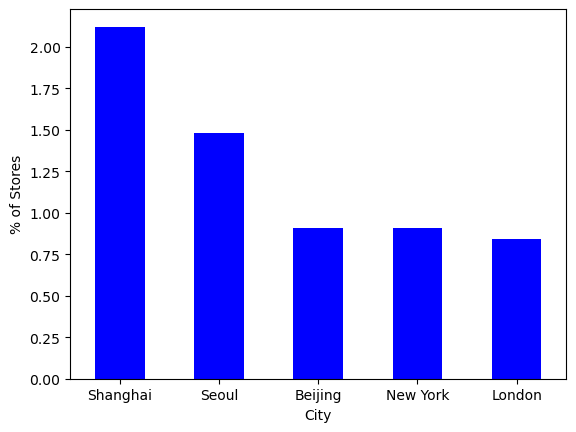

Shanghai       2.12
Seoul          1.48
Beijing        0.91
New York       0.91
London         0.84
Toronto        0.75
Mexico City    0.70
Chicago        0.70
Las Vegas      0.61
Seattle        0.61
Houston        0.60
Istanbul       0.56
Vancouver      0.55
San Diego      0.53
Calgary        0.51
Name: City, dtype: float64


In [39]:
import matplotlib.pyplot as plt
starbucks1.replace(non_eng,inplace=True)
city_saturations = percents(starbucks1['City'], pd.value_counts)
ax = city_saturations[:5].plot(kind='bar',color='blue',rot=0)
ax.set_ylabel('% of Stores')
ax.set_xlabel('City')
plt.show()
print(city_saturations[:15])

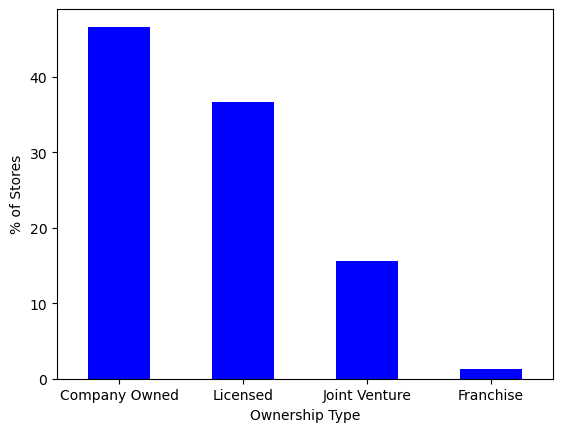

Company Owned    46.61
Licensed         36.62
Joint Venture    15.53
Franchise         1.24
Name: Ownership Type, dtype: float64


In [37]:
ownership_type = percents(starbucks1['Ownership Type'], pd.value_counts)
ax = ownership_type.plot(kind='bar',color='blue',rot=0)
ax.set_ylabel('% of Stores')
ax.set_xlabel('Ownership Type')
plt.show()
print(ownership_type)

In [41]:
#Chinese and US-only DataFrames
chinese_bucks = starbucks1.loc[starbucks1['Country'] == 'CN']
us_bucks = starbucks1.loc[starbucks1['Country'] == 'US']

#Ownership-Type by Country
us_own_type = percents(us_bucks['Ownership Type'], pd.value_counts)
cn_own_type = percents(chinese_bucks['Ownership Type'], pd.value_counts)

#Print the Distributions
print('---------------------------------')
print('US Stores')
print(us_own_type)
print('---------------------------------')
print('Chinese Stores')
print(cn_own_type)
print('---------------------------------')

---------------------------------
US Stores
Company Owned    60.45
Licensed         39.55
Name: Ownership Type, dtype: float64
---------------------------------
Chinese Stores
Company Owned    48.98
Joint Venture    44.62
Licensed          6.40
Name: Ownership Type, dtype: float64
---------------------------------
